In [607]:
#Importing the libraries
import pandas as pd # linear algebra
import numpy as np # data processing
import seaborn as sns #Visualization
import matplotlib.pyplot as plt
import matplotlib.cm
from sklearn.preprocessing import Imputer
from pandas.tools.plotting import parallel_coordinates

In [ ]:
#Read data into pandas dataframe

In [76]:
rent_secondhand_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41g-price-sh-house-area-by_year_1.csv')
rent_house_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41e-price-new-house-area-by_year_1.csv')
rent_apartment_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41i-price-new-app-area-by_year_1.csv')


In [77]:
rent_secondhand_data.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1997,"102,623","132,176","88,454","101,020","77,905","73,548","86,175"
1,1998,"134,428","178,534","110,700","127,709","96,967","94,143","111,726"
2,1999,"163,142","212,383","140,015","148,177","118,943","115,884","135,266"
3,2000,"190,165","248,451","169,491","168,121","140,397","141,922","158,679"
4,2001,"206,490","271,421","180,467","192,652","158,600","157,830","171,958"


In [78]:
rent_house_data.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1997,"102,037","123,231","96,504","111,108","91,236","92,372","94,642"
1,1998,"124,368","159,558","112,166","118,917","104,327","108,789","116,639"
2,1999,"147,043","191,942","140,797","137,510","122,146","132,510","137,031"
3,2000,"166,155","216,433","164,535","160,972","146,838","145,087","154,141"
4,2001,"181,146","252,192","175,372","171,578","154,515","157,767","167,493"


In [79]:
rent_apartment_data.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1997,"104,299","115,605","89,070","98,561","87,962","82,269","95,075"
1,1998,"134,823","166,677","111,795","117,404","103,565","100,717","115,759"
2,1999,"168,033","201,714","144,711","152,428","118,980","125,421","135,331"
3,2000,"205,682","243,338","191,725","190,509","137,457","152,424","150,911"
4,2001,"196,386","224,485","159,741","168,145","129,876","127,174","153,404"


In [80]:
rent_house_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41e-price-new-house-area-by_year_1.csv')

In [27]:
rent_house_data.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1997,"102,037","123,231","96,504","111,108","91,236","92,372","94,642"
1,1998,"124,368","159,558","112,166","118,917","104,327","108,789","116,639"
2,1999,"147,043","191,942","140,797","137,510","122,146","132,510","137,031"
3,2000,"166,155","216,433","164,535","160,972","146,838","145,087","154,141"
4,2001,"181,146","252,192","175,372","171,578","154,515","157,767","167,493"


In [81]:
rent_secondhand_data.columns

Index(['YEAR', 'National Average', 'Dublin ', 'Cork', 'Galway', 'Limerick',
       'Waterford', 'Other Areas'],
      dtype='object')

In [197]:
#Adding a new feature type to all CSV files and combining them into a single dataframe.
#Using Oridnal values
rent_secondhand_data['type'] = 0
rent_apartment_data['type']= 1
rent_house_data['type'] = 2
rent_secondhand_data.columns
rent_house_data.columns
rent_apartment_data.columns

Index(['YEAR', 'National Average', 'Dublin ', 'Cork', 'Galway', 'Limerick',
       'Waterford', 'Other Areas', 'type'],
      dtype='object')

In [528]:
combine = pd.concat([rent_secondhand_data,rent_house_data,rent_apartment_data], ignore_index=True)
combine.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,type
0,1997,"102,623","132,176","88,454","101,020","77,905","73,548","86,175",0
1,1998,"134,428","178,534","110,700","127,709","96,967","94,143","111,726",0
2,1999,"163,142","212,383","140,015","148,177","118,943","115,884","135,266",0
3,2000,"190,165","248,451","169,491","168,121","140,397","141,922","158,679",0
4,2001,"206,490","271,421","180,467","192,652","158,600","157,830","171,958",0


In [281]:
combine.tail()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,type
52,2011,"174,421","197,514","149,000",-,"107,500","145,000","116,113",1
53,2012,"150,912","171,160","250,000","137,200","134,500",-,"98,421",1
54,2013,"135,434","156,656","121,250",-,"85,000",-,"95,012",1
55,2014,"208,495","253,915","180,000","109,500","47,500","109,000","120,770",1
56,2015,"232,850","303,821","111,714","138,500",-,"105,000","132,497",1


In [282]:
combine.describe()

,YEAR,type
count,57.000000,57.000000
mean,2006.000000,1.000000
std,5.525913,0.823754
min,1997.000000,0.000000
25%,2001.000000,0.000000
50%,2006.000000,1.000000
75%,2011.000000,2.000000
max,2015.000000,2.000000


In [201]:
#The numerical data of prices of counties and national average is not being described.
combine.columns

Index(['YEAR', 'National Average', 'Dublin ', 'Cork', 'Galway', 'Limerick',
       'Waterford', 'Other Areas', 'type'],
      dtype='object')

In [202]:
rent_secondhand_data.describe()

,YEAR,type
count,19.000000,19.0
mean,2006.000000,0.0
std,5.627314,0.0
min,1997.000000,0.0
25%,2001.500000,0.0
50%,2006.000000,0.0
75%,2010.500000,0.0
max,2015.000000,0.0


In [564]:
combine = combine.rename(columns={'Dublin ':'Dublin'})
combine = combine.rename(columns={'Other Areas':'Other'})
combine = combine.rename(columns={'National Average':'Average'})
combine.columns

Index(['YEAR', 'Average', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other', 'type'],
      dtype='object')

In [565]:
#Fill the missing values with 0, to convert the datatype to int
combine['Galway'] = combine.Galway.str.replace('-', '0').astype(str)
combine['Limerick'] = combine.Limerick.str.replace('-', '0').astype(str)
combine['Waterford'] = combine.Waterford.str.replace('-', '0').astype(str)


In [566]:
#Successfully converted.
(combine[['Galway','Limerick','Waterford']]=='-').sum()

Galway       0
Limerick     0
Waterford    0
dtype: int64

In [567]:
#Remove the comma and convert the strings to integer type.
columns = ['Average','Dublin','Cork','Galway','Limerick','Waterford','Other']
combine['Average'] = combine.Average.str.replace(',', '').astype(int)
combine['Dublin'] = combine.Dublin.str.replace(',', '').astype(int)
combine['Cork'] = combine.Cork.str.replace(',', '').astype(int)
combine['Galway'] = combine.Galway.str.replace(',', '').astype(int)


In [568]:
combine['Limerick'] = combine.Limerick.str.replace(',', '').astype(int)



In [569]:
combine['Other'] = combine.Other.str.replace(',', '').astype(int)

In [570]:
combine.dtypes

YEAR          int64
Average       int64
Dublin        int64
Cork          int64
Galway        int64
Limerick      int64
Waterford    object
Other         int64
type          int64
dtype: object

In [571]:
combine['Waterford'] = combine.Waterford.str.replace(',', '').astype(int)

In [572]:
#Changed all datatypes from String to suitable values
combine.dtypes

YEAR         int64
Average      int64
Dublin       int64
Cork         int64
Galway       int64
Limerick     int64
Waterford    int64
Other        int64
type         int64
dtype: object

In [573]:
combine.shape

(57, 9)

In [574]:
combine.describe()

,YEAR,Average,Dublin,Cork,Galway,Limerick,Waterford,Other,type
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2006.000000,233533.385965,301701.298246,217411.333333,205837.929825,179537.666667,175933.000000,192597.631579,1.000000
std,5.525913,68926.620143,102082.829704,71107.747619,74456.726812,65104.273415,72513.055042,60259.942422,0.823754
min,1997.000000,102037.000000,115605.000000,88454.000000,0.000000,0.000000,0.000000,86175.000000,0.000000
25%,2001.000000,190165.000000,224485.000000,169491.000000,160972.000000,129876.000000,132510.000000,149345.000000,0.000000
50%,2006.000000,233173.000000,302053.000000,227290.000000,210419.000000,193854.000000,174365.000000,198214.000000,1.000000
75%,2011.000000,278774.000000,364738.000000,255978.000000,248041.000000,224873.000000,223468.000000,234696.000000,2.000000
max,2015.000000,383996.000000,543959.000000,372720.000000,348822.000000,290670.000000,295397.000000,317635.000000,2.000000


In [575]:
#Here the value minimum=0 for Galway,Limerick,Waterford is incorrect and caused due to missing values
#Using an imputer to fix this.
(combine[['Galway','Limerick','Waterford']] == 0).sum()


Galway       2
Limerick     1
Waterford    3
dtype: int64

In [576]:
combine[['Galway','Limerick','Waterford']] = combine[['Galway','Limerick','Waterford']].replace(0, np.NaN)
print(combine.isnull().sum())

YEAR         0
Average      0
Dublin       0
Cork         0
Galway       2
Limerick     1
Waterford    3
Other        0
type         0
dtype: int64


In [577]:
#Fill the missing values with mean. No more 0's in the dataset
dummy = combine.fillna(combine.mean(), inplace=True)
(combine[['Galway','Limerick','Waterford']] == 0).sum()

Galway       0
Limerick     0
Waterford    0
dtype: int64

In [596]:
#Describe the dataset
combine.describe()

,YEAR,Average,Dublin,Cork,Galway,Limerick,Waterford,Other,type
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2006.000000,233533.385965,301701.298246,217411.333333,213322.945455,182743.696429,185707.055556,192597.631579,1.000000
std,5.525913,68926.620143,102082.829704,71107.747619,63052.292134,60437.444414,59227.168336,60259.942422,0.823754
min,1997.000000,102037.000000,115605.000000,88454.000000,98561.000000,47500.000000,73548.000000,86175.000000,0.000000
25%,2001.000000,190165.000000,224485.000000,169491.000000,168145.000000,134500.000000,145000.000000,149345.000000,0.000000
50%,2006.000000,233173.000000,302053.000000,227290.000000,213322.945455,193854.000000,179716.000000,198214.000000,1.000000
75%,2011.000000,278774.000000,364738.000000,255978.000000,248041.000000,224873.000000,223468.000000,234696.000000,2.000000
max,2015.000000,383996.000000,543959.000000,372720.000000,348822.000000,290670.000000,295397.000000,317635.000000,2.000000


In [579]:
#The difference between mean and median is not very significant. 
print(combine.median())

YEAR           2006.000000
Average      233173.000000
Dublin       302053.000000
Cork         227290.000000
Galway       213322.945455
Limerick     193854.000000
Waterford    179716.000000
Other        198214.000000
type              1.000000
dtype: float64


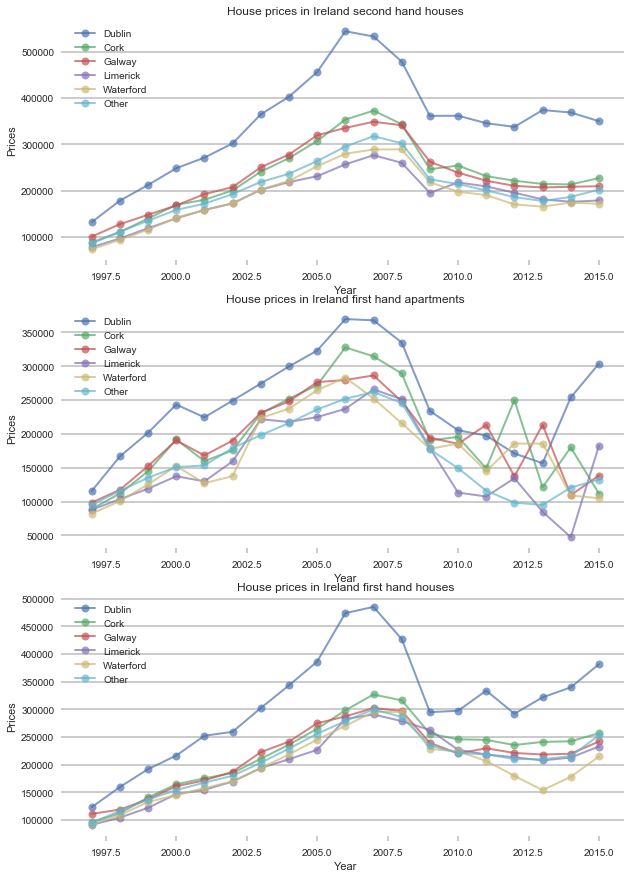

In [581]:
#Data Visualization
#Housing prices in different counties based on type of house and year
def plot_by_type(obj,type_name):
    counties = ['Dublin','Cork','Galway','Limerick','Waterford','Other']
    for county in counties:
        ax.plot(obj['YEAR'], obj[county], lw=2, marker='o', markersize=8,
                markeredgecolor='w', alpha=0.7, label=county)
    ax.tick_params(length=5, width=2, direction='out', color='#cccccc')
    ax.yaxis.grid(color='#cccccc', linestyle='-', lw=2)
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Prices')
    ax.set_title('House prices in Ireland '+type_name)

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(10)

second_hand = combine[combine.type == 0]
apartments = combine[combine.type == 1]
houses = combine[combine.type == 2]
type_names = ['second hand houses','first hand apartments','first hand houses']
objects = [second_hand, apartments, houses]

for i in range(3):
    ax = plt.subplot(3,1,i+1,facecolor='w')
    plot_by_type(objects[i],type_names[i])
plt.show()


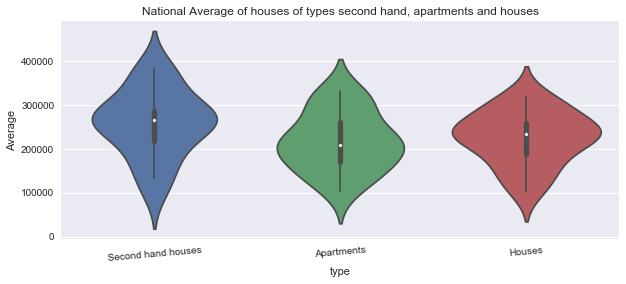

In [582]:
#Clearly Dublin has highest price in all type of houses, followed by Cork and Galway.
#Prices of Second hand houses have surpassed first hand houses many times. They were probably bigger and in
#better places
#Apartments are the most affordable kind of houses.

#National average price of different kind of houses over the years.
sns.set()
fig, ax = plt.subplots(figsize=(10,4))
plt.title('National Average of houses of types second hand, apartments and houses')
sns.violinplot(x="type", y="Average", data=combine, ax=ax)
plt.xticks([0,1,2],['Second hand houses','Apartments','Houses'], rotation=5)
plt.show()

In [590]:
prices = combine.drop(['YEAR','type'],axis = 1)
prices.columns

Index(['Average', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other'],
      dtype='object')

In [382]:
prices.columns

Index(['Average', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other'],
      dtype='object')

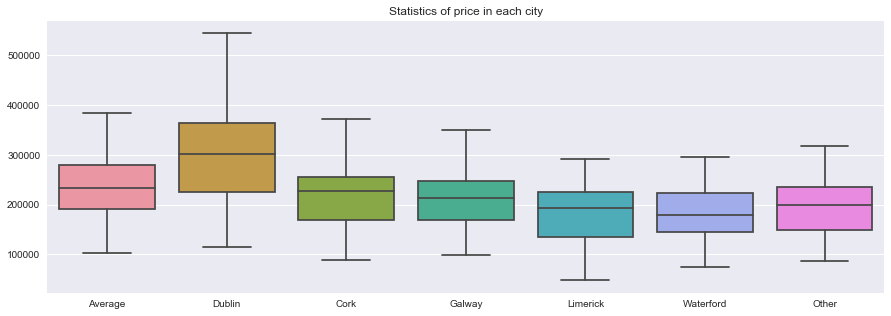

In [399]:
#Minimum, maximum and median prices of houses in each county.
'''
Dublin is much expensive compared to the rest. Cork, Galway are on the same price range. Limerick and Waterford are
also in the same price range.
'''
plt.subplots(figsize = (15,5))
plt.title('Statistics of price in each city')
sns.boxplot(data = prices)
plt.show()


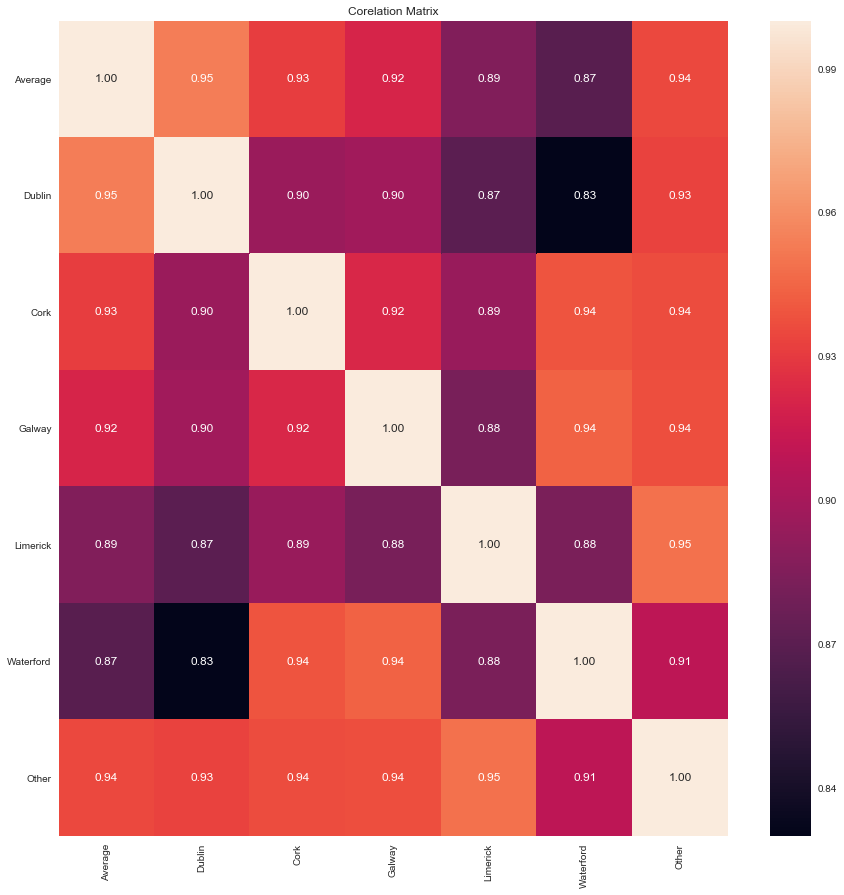

In [423]:
#The data is highly correlated indicating they are all essentially explaining the same information
plt.figure(figsize=(15,15))
sns.heatmap(prices.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.title('Corelation Matrix')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



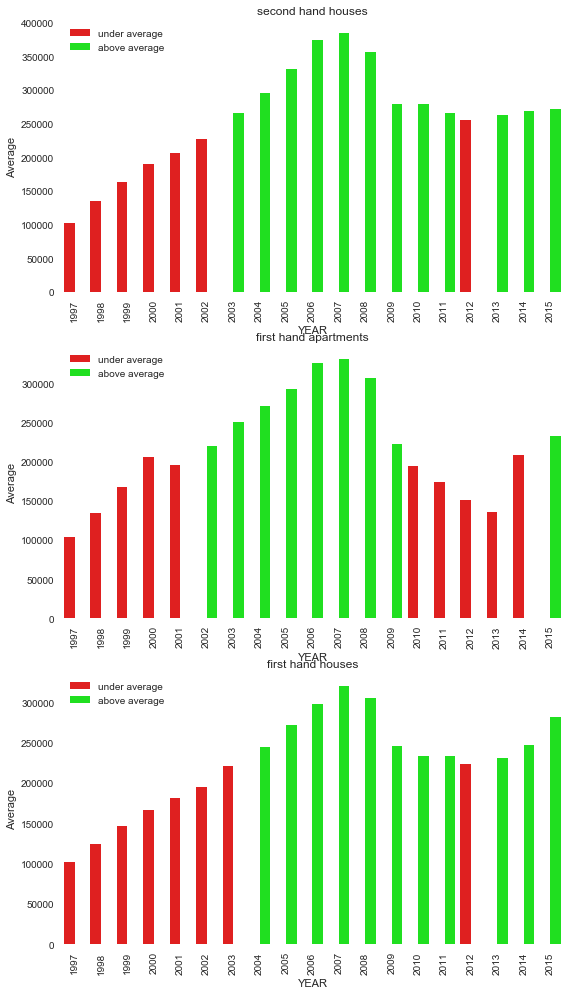

In [520]:
#All property values dropped after 2007. Recession after effect. All property values are raising again since 2013.
#Apartment prices are raising rapidly, but it's still cheaper than first and second hand houses.
def bar_plot(obj, types):
    ave = sum(obj.Average)/float(len(obj))
    obj['ave_line'] = ave
    obj['avg'] = ['above average' if i > ave else 'under average' for i in obj.Average]
    sns.set_style('dark')
    
    sns.barplot(x='YEAR', y = 'Average', hue = 'avg',data= obj,palette={'above average':'lime', 'under average': 'red'})
    plt.title(types)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    print()

f = plt.figure()
f.set_figheight(17)
f.set_figwidth(9)

for i in range(3):
    ax = plt.subplot(3,1,i+1,facecolor='w')
    bar_plot(objects[i], type_names[i])
plt.show()


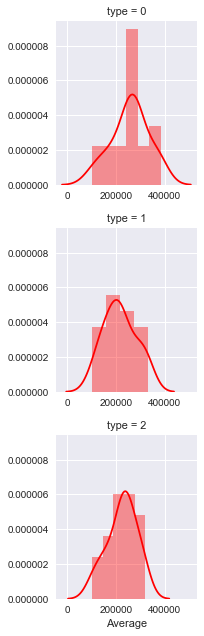

In [583]:
g = sns.FacetGrid(combine, row="type") 
g.map(sns.distplot, 'Average',color = 'r') 
plt.show()

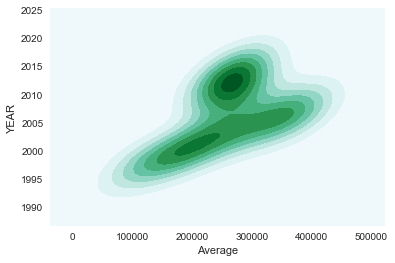

In [584]:
#Prices in different cities based on type of house
ax = sns.kdeplot(second_hand.Average, second_hand.YEAR, shade=True)
plt.title('Second hand house prices national average')
plt.show()

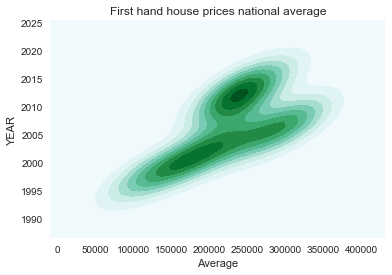

In [586]:
ax = sns.kdeplot(houses.Average, houses.YEAR, shade=True)
plt.title('First hand house prices national average')
plt.show()

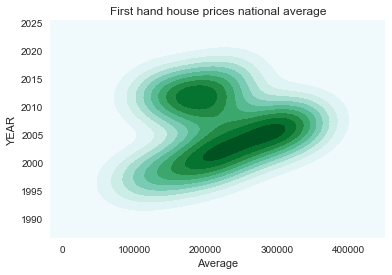

In [588]:
ax = sns.kdeplot(apartments.Average, apartments.YEAR, shade=True)
plt.title('First hand house prices national average')
plt.show()

NameError: name 'sns' is not defined

NameError: name 'combine' is not defined